# Read data

------

In [8]:
import numpy as np
import pandas as pd

h1 = pd.read_csv("H1.csv")
h1["HotelType"] = "Resort"
h2 = pd.read_csv("H2.csv")
h2["HotelType"] = "City"
df = pd.concat([h1, h2], ignore_index=True)
df.describe()


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,PreviousCancellations,PreviousBookingsNotCanceled,BookingChanges,DaysInWaitingList,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
df.dtypes

IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent                           object
Company                         object
DaysInWaitingList                int64
CustomerType             

# Cleaning data
------

In [10]:
# Backup data
booking = df.copy()
booking.info()

# Trimming the ending space at the end of string values
for col in booking.select_dtypes(include='object'):
    booking[col] = booking[col].str.strip()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   IsCanceled                   119390 non-null  int64  
 1   LeadTime                     119390 non-null  int64  
 2   ArrivalDateYear              119390 non-null  int64  
 3   ArrivalDateMonth             119390 non-null  object 
 4   ArrivalDateWeekNumber        119390 non-null  int64  
 5   ArrivalDateDayOfMonth        119390 non-null  int64  
 6   StaysInWeekendNights         119390 non-null  int64  
 7   StaysInWeekNights            119390 non-null  int64  
 8   Adults                       119390 non-null  int64  
 9   Children                     119386 non-null  float64
 10  Babies                       119390 non-null  int64  
 11  Meal                         119390 non-null  object 
 12  Country                      118902 non-null  object 
 13 

Check missing values

In [11]:
missing_values_count = booking.isnull().sum()
missing_values_count.sort_values()

IsCanceled                       0
ReservationStatus                0
TotalOfSpecialRequests           0
RequiredCarParkingSpaces         0
ADR                              0
CustomerType                     0
DaysInWaitingList                0
Company                          0
Agent                            0
DepositType                      0
BookingChanges                   0
AssignedRoomType                 0
ReservedRoomType                 0
PreviousBookingsNotCanceled      0
PreviousCancellations            0
IsRepeatedGuest                  0
DistributionChannel              0
MarketSegment                    0
Meal                             0
Babies                           0
Adults                           0
StaysInWeekNights                0
StaysInWeekendNights             0
ArrivalDateDayOfMonth            0
ArrivalDateWeekNumber            0
ArrivalDateMonth                 0
ArrivalDateYear                  0
LeadTime                         0
ReservationStatusDat

Fill missing values

In [12]:
# Fill missing values
booking['Children'].fillna(0, inplace=True)
booking['Agent'].fillna(0, inplace=True)
booking['Company'].fillna(0, inplace=True)
booking['Country'].fillna("Undefined", inplace=True)

# Replace type for number of children
booking['Children'] = booking['Children'].astype(np.int64)
# booking.info()

In [13]:
# Replace inconsitent data 
booking["Meal"].replace(["Undefined"], "SC", inplace=True)

booking.loc[booking["ADR"] < 0, "ADR"] = 0
booking.loc[(df["IsRepeatedGuest"] == 0) & (booking["PreviousBookingsNotCanceled"] + booking["PreviousCancellations"] > 0), "IsRepeatedGuest"] = 1

# Delete records with 0 guests
booking = booking[(booking['Adults'] + booking['Children'] + booking['Babies']) > 0]

# Delete records with 0 night stay
booking = booking[booking["StaysInWeekendNights"] + booking["StaysInWeekNights"] > 0]

In [14]:
booking.to_csv("booking.csv", index=False)

# EDA
----

In [15]:
booking.median(axis = 0, skipna = True, numeric_only = True)

IsCanceled                        0.0
LeadTime                         70.0
ArrivalDateYear                2016.0
ArrivalDateWeekNumber            28.0
ArrivalDateDayOfMonth            16.0
StaysInWeekendNights              1.0
StaysInWeekNights                 2.0
Adults                            2.0
Children                          0.0
Babies                            0.0
IsRepeatedGuest                   0.0
PreviousCancellations             0.0
PreviousBookingsNotCanceled       0.0
BookingChanges                    0.0
DaysInWaitingList                 0.0
ADR                              95.0
RequiredCarParkingSpaces          0.0
TotalOfSpecialRequests            0.0
dtype: float64

In [16]:
corr = booking.corr(numeric_only=True)['IsCanceled'][:]
corr

IsCanceled                     1.000000
LeadTime                       0.291515
ArrivalDateYear                0.015438
ArrivalDateWeekNumber          0.009019
ArrivalDateDayOfMonth         -0.006108
StaysInWeekendNights          -0.004859
StaysInWeekNights              0.020703
Adults                         0.057575
Children                       0.004678
Babies                        -0.032672
IsRepeatedGuest                0.153568
PreviousCancellations          0.109974
PreviousBookingsNotCanceled   -0.057541
BookingChanges                -0.145198
DaysInWaitingList              0.053941
ADR                            0.039367
RequiredCarParkingSpaces      -0.196804
TotalOfSpecialRequests        -0.236165
Name: IsCanceled, dtype: float64

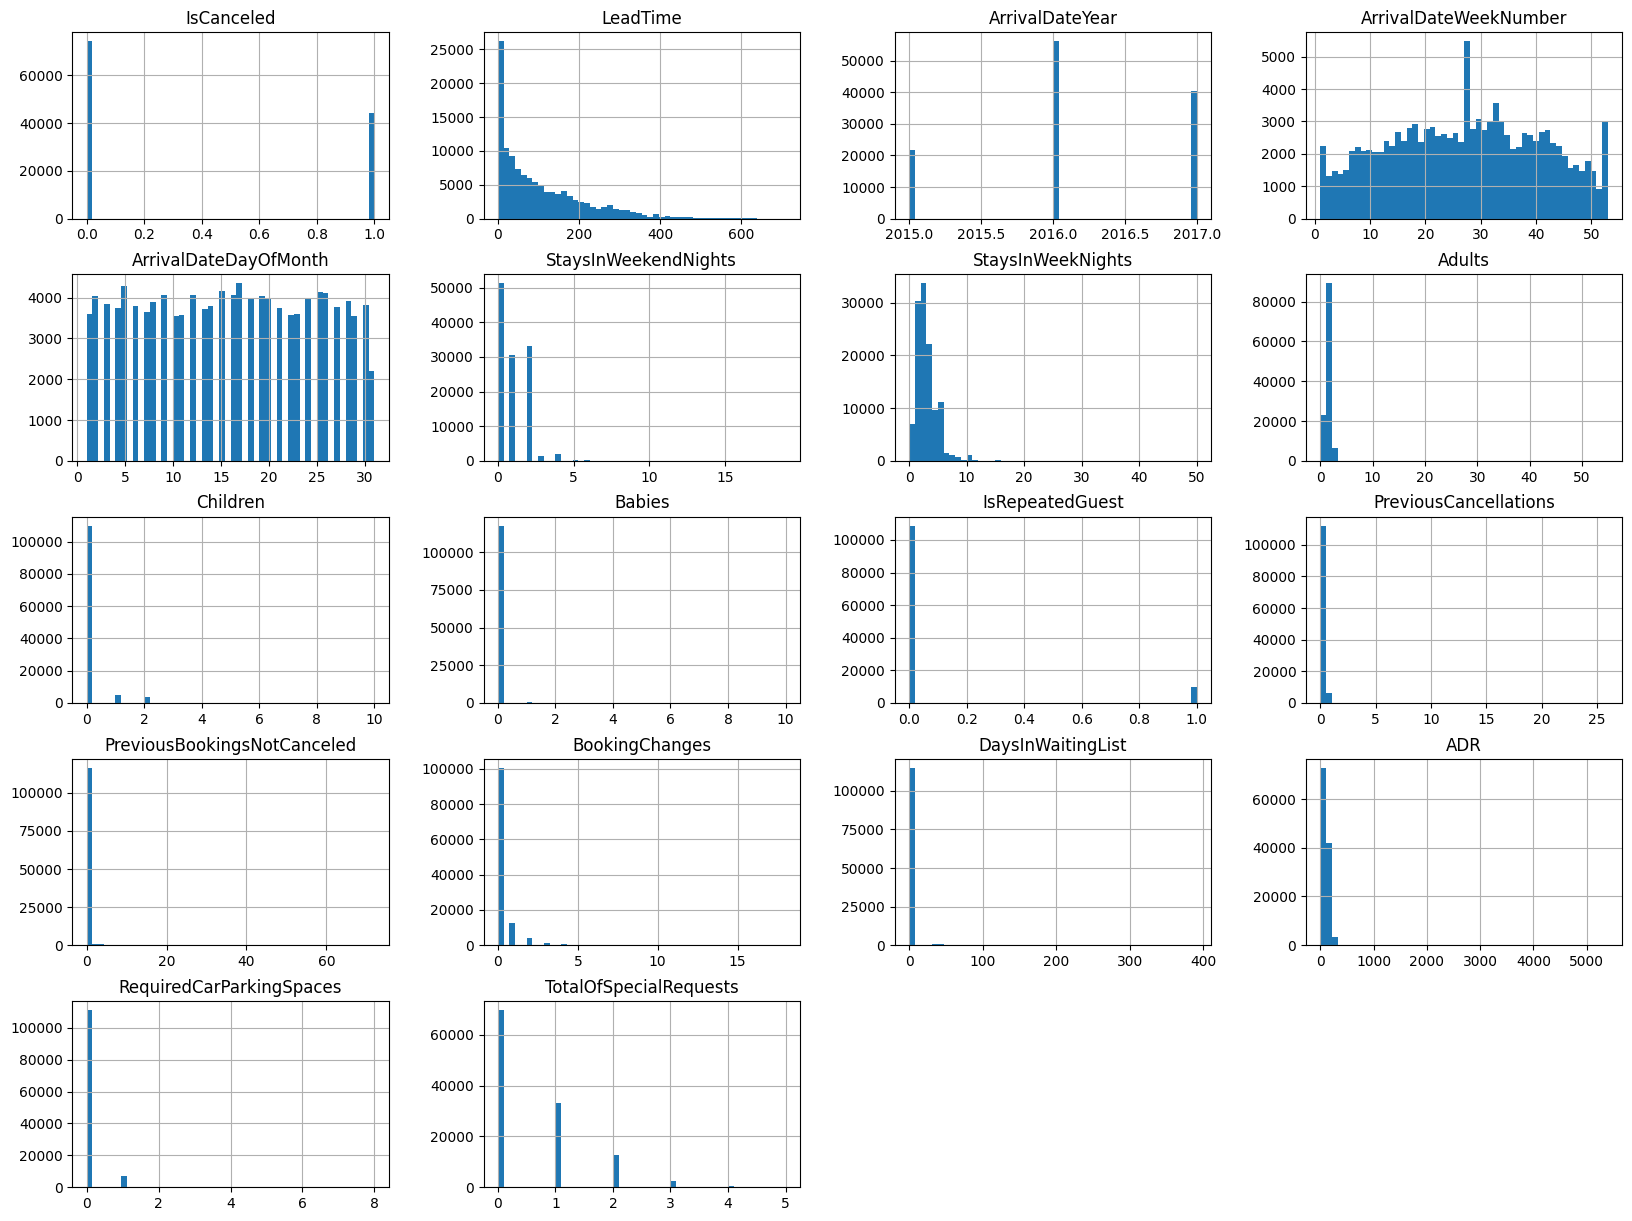

In [17]:
import matplotlib.pyplot as plt
booking.hist(bins=50, figsize=(20,15))
plt.show()

### Univariate EDA

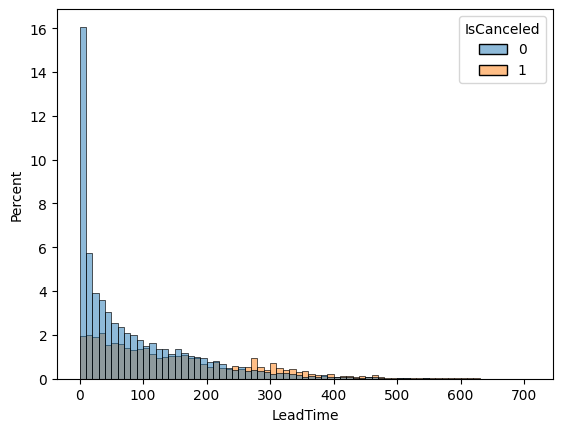

In [18]:
import seaborn as sns

binwidth = 10
ax1 = sns.histplot(data=booking, x="LeadTime", hue="IsCanceled", bins=range(min(booking["LeadTime"]), max(booking["LeadTime"]) + binwidth, binwidth), stat="percent")

People book far ahead are likely to cancel more

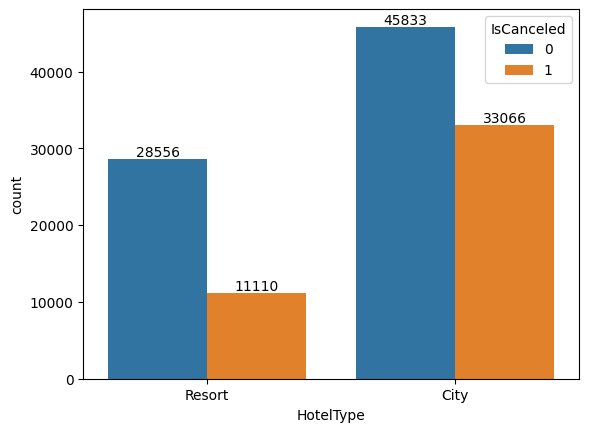

In [19]:
ax = sns.countplot(data=booking, x='HotelType', hue='IsCanceled')
for container in ax.containers:
    ax.bar_label(container)

Bookings for city hotels are more likely to be canceled and they have more demands than resort hotels

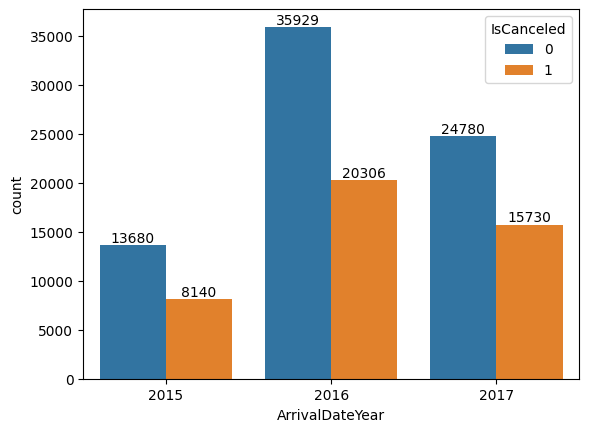

In [20]:
ax = sns.countplot(data=booking, x='ArrivalDateYear', hue='IsCanceled')
for container in ax.containers:
    ax.bar_label(container)

<Axes: xlabel='ArrivalDateYear', ylabel='frequency'>

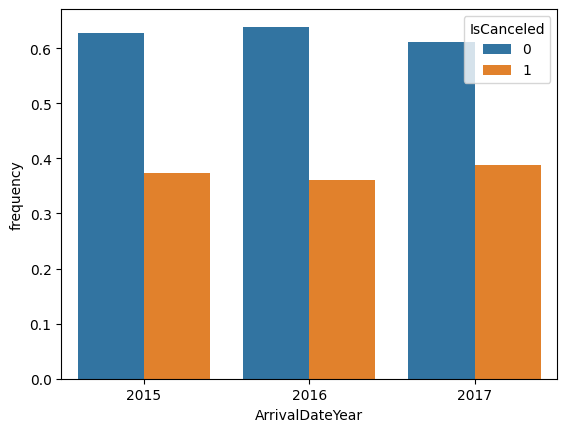

In [21]:
booking['frequency'] = 0
counts = booking.groupby(["ArrivalDateYear", 'IsCanceled']).count()
freq_per_group = counts.div(counts.groupby('ArrivalDateYear').transform('sum')).reset_index()
sns.barplot(x="ArrivalDateYear", y='frequency', hue='IsCanceled', data=freq_per_group)

2016 has the highest number of bookings and the percentage of cancellations for every year is stable at about 40%

D:\Cache\TEMP\ipykernel_1036\1087876058.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

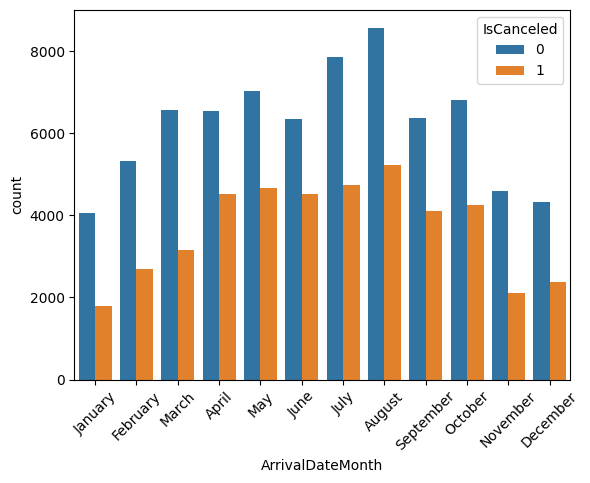

In [22]:
chart = sns.countplot(data=booking, x='ArrivalDateMonth', hue='IsCanceled',
        order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

D:\Cache\TEMP\ipykernel_1036\3099482724.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation=45)


[Text(0, 0, 'January'),
 Text(1, 0, 'February'),
 Text(2, 0, 'March'),
 Text(3, 0, 'April'),
 Text(4, 0, 'May'),
 Text(5, 0, 'June'),
 Text(6, 0, 'July'),
 Text(7, 0, 'August'),
 Text(8, 0, 'September'),
 Text(9, 0, 'October'),
 Text(10, 0, 'November'),
 Text(11, 0, 'December')]

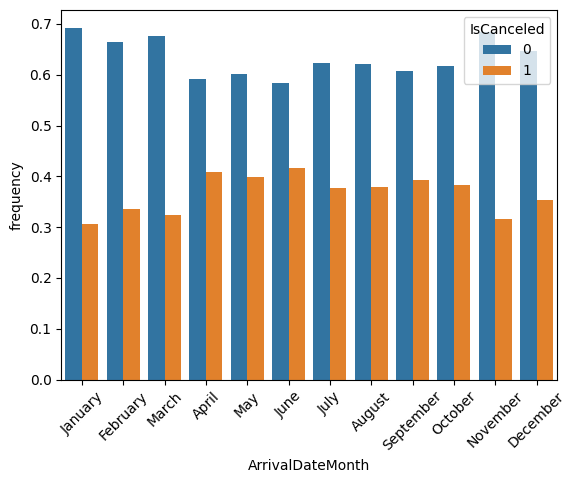

In [23]:
booking['frequency'] = 0
counts = booking.groupby(["ArrivalDateMonth", 'IsCanceled']).count()
freq_per_group = counts.div(counts.groupby('ArrivalDateMonth').transform('sum')).reset_index()
chart = sns.barplot(x="ArrivalDateMonth", y='frequency', hue='IsCanceled', data=freq_per_group,
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)

Summertime (April - August) has more bookings and thefore theri booking cancellations rate is also higher

In [24]:
# Group countries into continents
import pycountry_convert as pc

booking.loc[booking["Country"] == "CN", "Country"] = "CHN"
booking.loc[booking["Country"] == "TMP", "Country"] = "TLS"
continent = booking.copy()

for index, row in continent.iterrows():
    if row["Country"] == "Undefined":
        continue
    country_code = pc.country_alpha3_to_country_alpha2(row["Country"])
    if country_code == "TL":
        continent.loc[index, 'Country'] = "AS"
        continue
    if country_code == "UM":
        continent.loc[index, 'Country'] = "OC"
        continue
    if country_code == "AQ":
        continent.loc[index, 'Country'] = "AN"
        continue
    if country_code == "TF":
        continent.loc[index, 'Country'] = "AF"
        continue
    continent.loc[index, 'Country'] = pc.country_alpha2_to_continent_code(country_code)
continent["Country"]


2         EU
3         EU
4         EU
5         EU
6         EU
          ..
119385    EU
119386    EU
119387    EU
119388    EU
119389    EU
Name: Country, Length: 118565, dtype: object

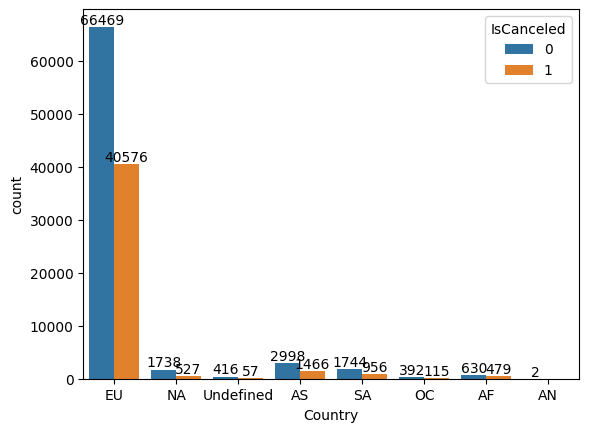

In [25]:
ax = sns.countplot(data=continent, x='Country', hue='IsCanceled')
for container in ax.containers:
    ax.bar_label(container)

The majority of all bookings come from Europe

<Axes: xlabel='IsRepeatedGuest', ylabel='count'>

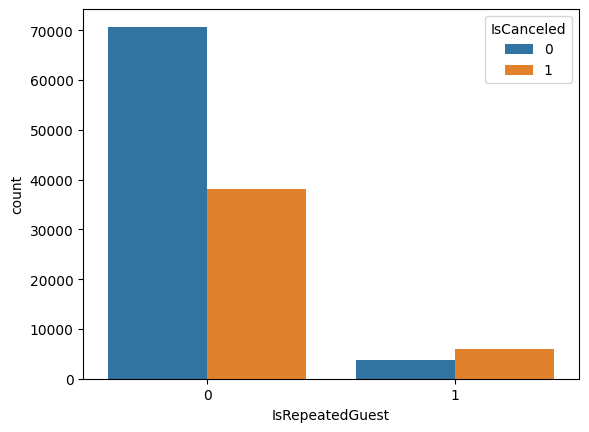

In [26]:
sns.countplot(data=booking, x='IsRepeatedGuest', hue='IsCanceled')

So repeated guests are more likely to cancel their bookings

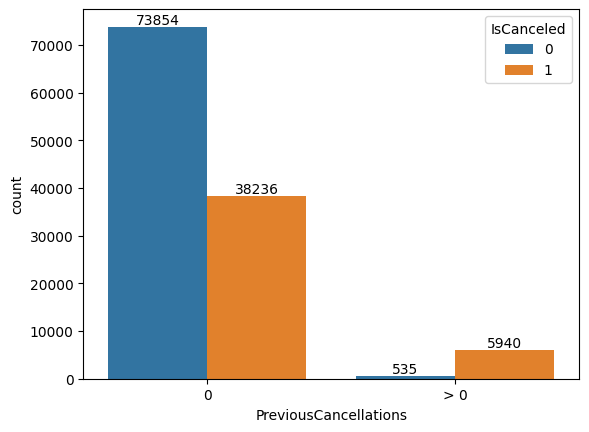

In [27]:
grouped_df = booking[booking['PreviousCancellations'] > 0].assign(PreviousCancellations='> 0')
grouped_df = pd.concat([booking[booking['PreviousCancellations'] == 0], grouped_df])

nums_of_canceled = [len(grouped_df[(grouped_df["PreviousCancellations"]==0) & (grouped_df["IsCanceled"] == 1)]), len(grouped_df[(grouped_df["PreviousCancellations"]=='> 0') & (grouped_df["IsCanceled"] == 1)])]
nums_of_not_canceled = [len(grouped_df[(grouped_df["PreviousCancellations"]==0) & (grouped_df["IsCanceled"] == 0)]), len(grouped_df[(grouped_df["PreviousCancellations"]=='> 0') & (grouped_df["IsCanceled"] == 0)])]

ax = sns.countplot(data=grouped_df, x='PreviousCancellations', hue='IsCanceled')
for container in ax.containers:
    ax.bar_label(container)

In [28]:
# sns.pointplot(data=booking, x='PreviousCancellations', y='IsCanceled')

Guests with cancellations history tend to cancel more

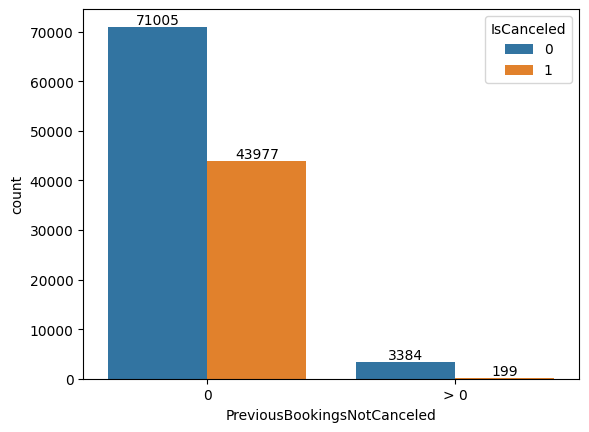

In [29]:
grouped_df = booking[booking['PreviousBookingsNotCanceled'] > 0].assign(PreviousBookingsNotCanceled='> 0')
grouped_df = pd.concat([booking[booking['PreviousBookingsNotCanceled'] == 0], grouped_df])

nums_of_canceled = [len(grouped_df[(grouped_df["PreviousBookingsNotCanceled"]==0) & (grouped_df["IsCanceled"] == 1)]), len(grouped_df[(grouped_df["PreviousBookingsNotCanceled"]=='> 0') & (grouped_df["IsCanceled"] == 1)])]
nums_of_not_canceled = [len(grouped_df[(grouped_df["PreviousBookingsNotCanceled"]==0) & (grouped_df["IsCanceled"] == 0)]), len(grouped_df[(grouped_df["PreviousBookingsNotCanceled"]=='> 0') & (grouped_df["IsCanceled"] == 0)])]
width = 0.4

ax = sns.countplot(data=grouped_df, x='PreviousBookingsNotCanceled', hue='IsCanceled')
for container in ax.containers:
    ax.bar_label(container)

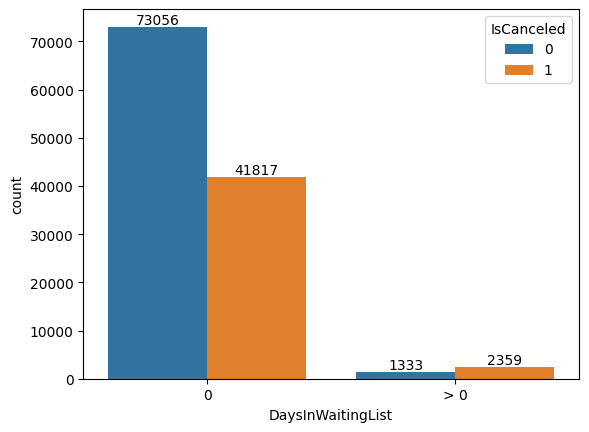

In [30]:
grouped_df = booking[booking['DaysInWaitingList'] > 0].assign(DaysInWaitingList='> 0')
grouped_df = pd.concat([booking[booking['DaysInWaitingList'] == 0], grouped_df])

nums_of_canceled = [len(grouped_df[(grouped_df["DaysInWaitingList"]==0) & (grouped_df["IsCanceled"] == 1)]), len(grouped_df[(grouped_df["DaysInWaitingList"]=='> 0') & (grouped_df["IsCanceled"] == 1)])]
nums_of_not_canceled = [len(grouped_df[(grouped_df["DaysInWaitingList"]==0) & (grouped_df["IsCanceled"] == 0)]), len(grouped_df[(grouped_df["DaysInWaitingList"]=='> 0') & (grouped_df["IsCanceled"] == 0)])]

# Plot the relation between DaysInWaitingList and IsCanceled
ax = sns.countplot(data=grouped_df, x='DaysInWaitingList', hue='IsCanceled')
for container in ax.containers:
    ax.bar_label(container)


Guests who have to wait more have the higher chance of cancelling their bookings.

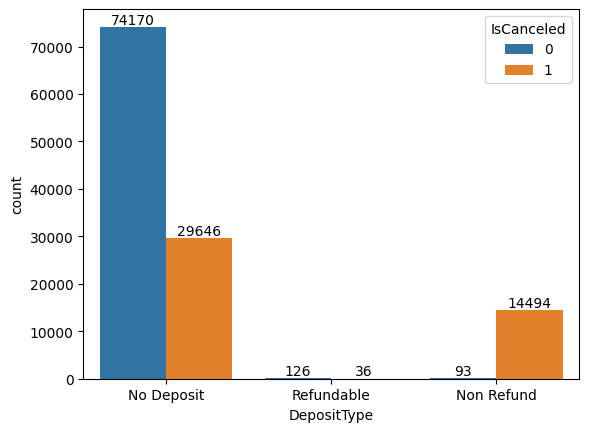

In [31]:
ax = sns.countplot(data=booking, x='DepositType', hue='IsCanceled')
for container in ax.containers:
    ax.bar_label(container)

Most of "Non Refund" bookings are cancelled and they also take up a large percentage of all booking cancellations

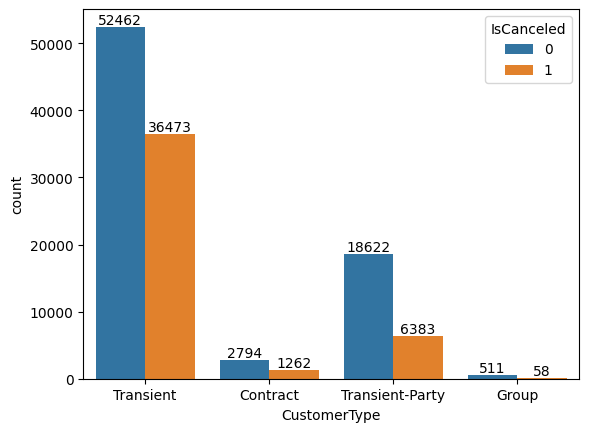

In [32]:
ax = sns.countplot(data=booking, x='CustomerType', hue='IsCanceled')
for container in ax.containers:
    ax.bar_label(container)

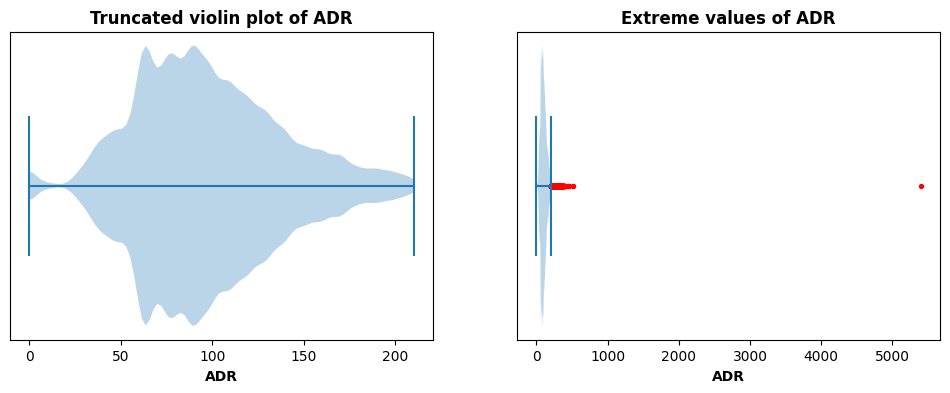

In [33]:
adr = booking['ADR'].copy().values

# Calculate the quartiles
q1, q3 = np.percentile(adr, [25, 75])

# Calculate the interquartile range
iqr = q3 - q1

# Define the thresholds for outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Remove the outliers
outliers_data = adr[(adr < lower_bound) | (adr > upper_bound)]
filtered_data = adr[(adr >= lower_bound) & (adr <= upper_bound)]

fig, ax = plt.subplots(1, 2, figsize=(12,4))

# truncated violin plot
ax[0].violinplot(filtered_data, vert=False)
ax[0].set_xlabel('ADR', fontweight='bold')
ax[0].set_title('Truncated violin plot of ADR', fontweight='bold')
ax[0].set_yticks([])

# scatter plot of extreme outliers (but legit values)
ax[1].violinplot(filtered_data, vert=False)
ax[1].scatter(outliers_data, [1]*len(outliers_data), color='red', s=8)
ax[1].set_xlabel('ADR', fontweight='bold')
ax[1].set_title('Extreme values of ADR', fontweight='bold')
ax[1].set_yticks([])

plt.show()

Remove outlier?

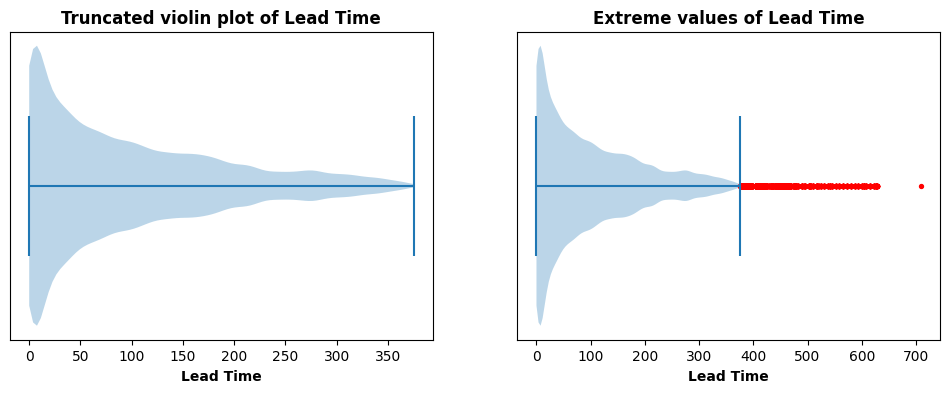

In [34]:
lead_time = booking['LeadTime'].copy().values

# Calculate the quartiles
q1, q3 = np.percentile(lead_time, [25, 75])

# Calculate the interquartile range
iqr = q3 - q1

# Define the thresholds for outliers
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

# Remove the outliers
outliers_data = lead_time[(lead_time < lower_bound) | (lead_time > upper_bound)]
filtered_data = lead_time[(lead_time >= lower_bound) & (lead_time <= upper_bound)]

fig, ax = plt.subplots(1, 2, figsize=(12,4))

# truncated violin plot
ax[0].violinplot(filtered_data, vert=False)
ax[0].set_xlabel('Lead Time', fontweight='bold')
ax[0].set_title('Truncated violin plot of Lead Time', fontweight='bold')
ax[0].set_yticks([])

# scatter plot of extreme outliers (but legit values)
ax[1].violinplot(filtered_data, vert=False)
ax[1].scatter(outliers_data, [1]*len(outliers_data), color='red', s=8)
ax[1].set_xlabel('Lead Time', fontweight='bold')
ax[1].set_title('Extreme values of Lead Time', fontweight='bold')
ax[1].set_yticks([])

plt.show()

Remove outlier?

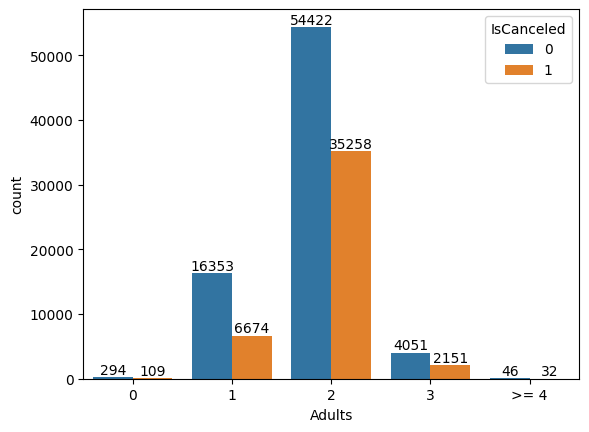

In [35]:
# Create a new dataframe to group values > 5
grouped_df = df[df['Adults'] >= 4].assign(Adults='>= 4')
grouped_df = pd.concat([df[df['Adults'] < 4], grouped_df])

# Plot the frequency diagram
ax = sns.countplot(data=grouped_df, x='Adults', hue='IsCanceled', order=[0, 1, 2, 3, ">= 4"])
for container in ax.containers:
    ax.bar_label(container)

# Plot the percentage chart
# grouped_df['frequency'] = 0
# counts = grouped_df.groupby(["Adults", 'IsCanceled']).count()
# freq_per_group = counts.div(counts.groupby('Adults').transform('sum')).reset_index()
# sns.barplot(x="Adults", y='frequency', hue='IsCanceled', data=freq_per_group, order=[0, 1, 2, 3, ">= 4"])

The number of adults for each bookings is mostly 0 - 3 adults.

D:\Cache\TEMP\ipykernel_1036\1525127140.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


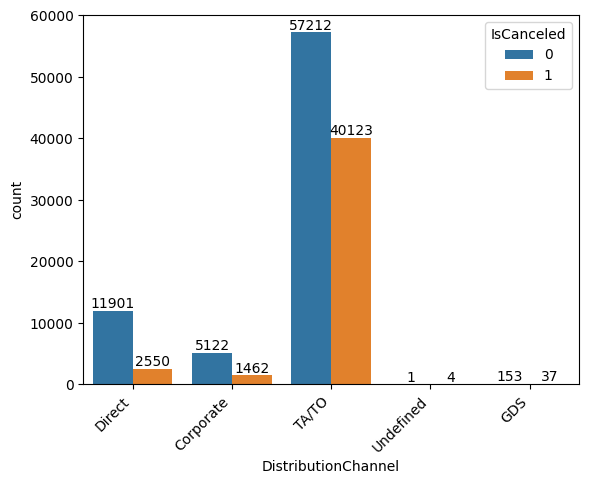

In [36]:
ax = sns.countplot(data=booking, x='DistributionChannel', hue="IsCanceled")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
for container in ax.containers:
    ax.bar_label(container)

How to deal with Undefined and GDS?

D:\Cache\TEMP\ipykernel_1036\271191563.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')


[Text(0, 0, 'Transient'),
 Text(1, 0, 'Contract'),
 Text(2, 0, 'Transient-Party'),
 Text(3, 0, 'Group')]

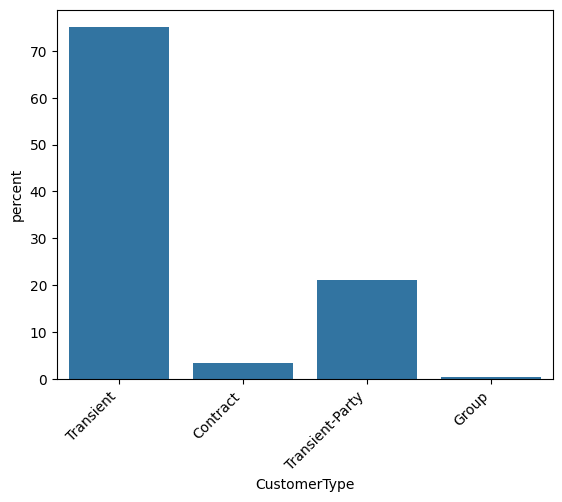

In [37]:
ax = sns.countplot(data=booking, x='CustomerType', stat="percent")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
# for container in ax.containers:
#     ax.bar_label(container)

# grouped_df['frequency'] = 0
# counts = grouped_df.groupby(["CustomerType", 'IsCanceled']).count()
# freq_per_group = counts.div(counts.groupby('CustomerType').transform('sum')).reset_index()
# sns.barplot(x="CustomerType", y='frequency', hue='IsCanceled', data=freq_per_group)


<Axes: xlabel='IsDesiredRoomType', ylabel='frequency'>

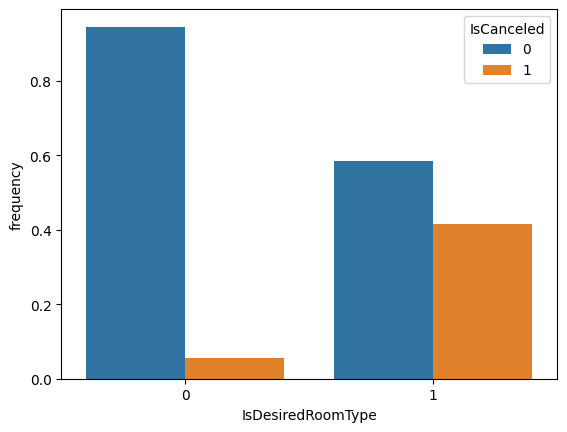

In [38]:
continent["IsDesiredRoomType"] = 0
continent.loc[continent["ReservedRoomType"] == continent["AssignedRoomType"], "IsDesiredRoomType"] = 1

continent['frequency'] = 0
counts = continent.groupby(["IsDesiredRoomType", 'IsCanceled']).count()
freq_per_group = counts.div(counts.groupby('IsDesiredRoomType').transform('sum')).reset_index()
sns.barplot(x="IsDesiredRoomType", y='frequency', hue='IsCanceled', data=freq_per_group)

# ax = sns.countplot(data=grouped_df, x='IsDesiredRoomType', hue='IsCanceled')
# for container in ax.containers:
#     ax.bar_label(container)

Contrary to our belief, people who were assigned diferrent room from the one they reserved have less percentage of booking cancellation.

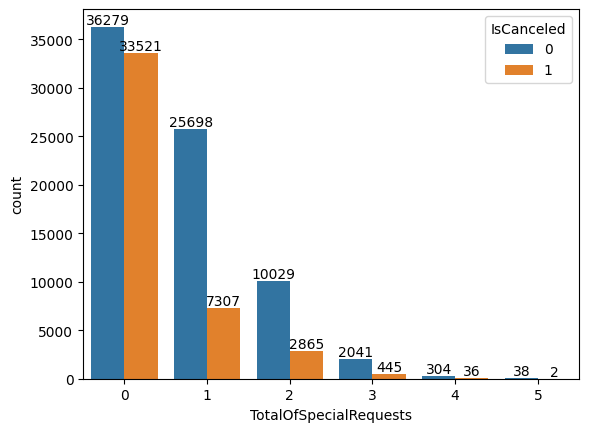

In [39]:
ax = sns.countplot(data=booking, x='TotalOfSpecialRequests', hue='IsCanceled')
for container in ax.containers:
    ax.bar_label(container)

# booking['frequency'] = 0
# counts = booking.groupby(["TotalOfSpecialRequests", 'IsCanceled']).count()
# freq_per_group = counts.div(counts.groupby('TotalOfSpecialRequests').transform('sum')).reset_index()
# sns.barplot(x="TotalOfSpecialRequests", y='frequency', hue='IsCanceled', data=freq_per_group)

People with no special requests tend to cancel more than those who order special requests.
The more number of special requests is, the less likely the booking is canceled.

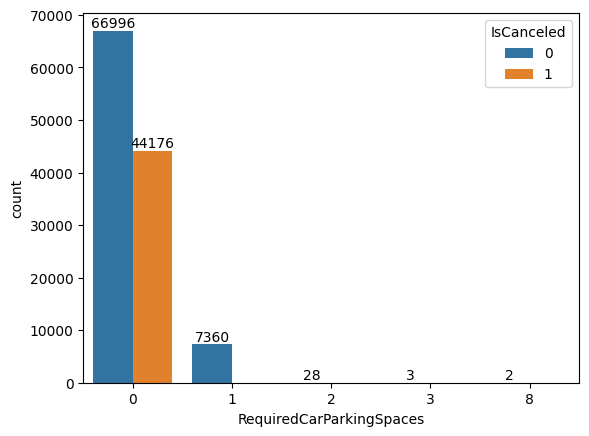

In [40]:
ax = sns.countplot(data=booking, x='RequiredCarParkingSpaces', hue='IsCanceled')
for container in ax.containers:
    ax.bar_label(container)

So the people need parking spaces won't cancel => Categorise this column into 2 types: need and dont need parking spaces?

### Multivariate EDA

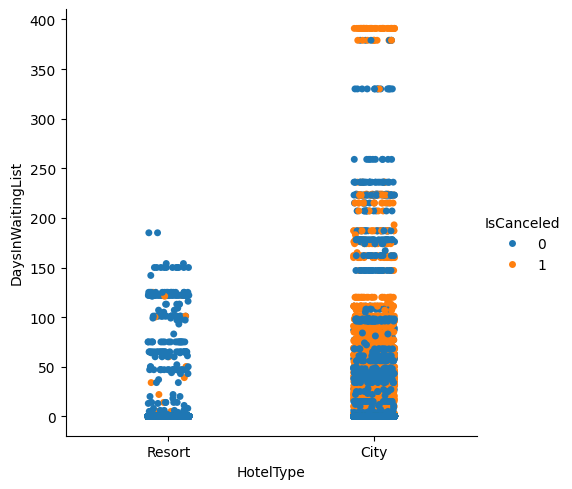

In [41]:
sns.catplot(data=booking, x="HotelType", y="DaysInWaitingList", hue="IsCanceled")

Bookings for city hotel have to wait more

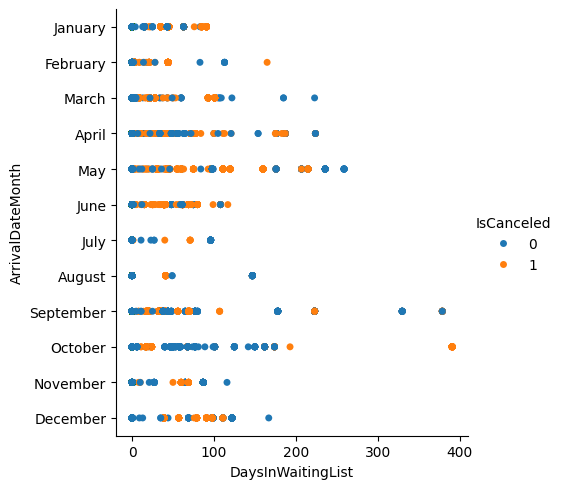

In [42]:
sns.catplot(data=booking, y='ArrivalDateMonth', x='DaysInWaitingList', hue='IsCanceled', jitter=False,
            order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

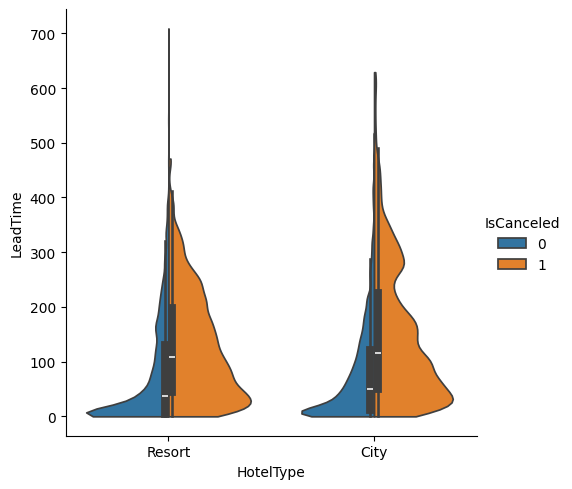

In [43]:
sns.catplot(data=booking, x="HotelType", y="LeadTime", hue="IsCanceled", kind="violin", split=True, cut=0)

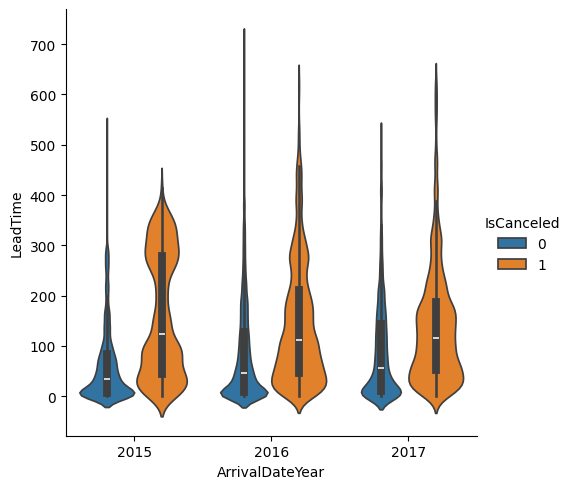

In [44]:
sns.catplot(data=booking, x="ArrivalDateYear", y="LeadTime", hue="IsCanceled", kind="violin")

<Axes: xlabel='HotelType', ylabel='count'>

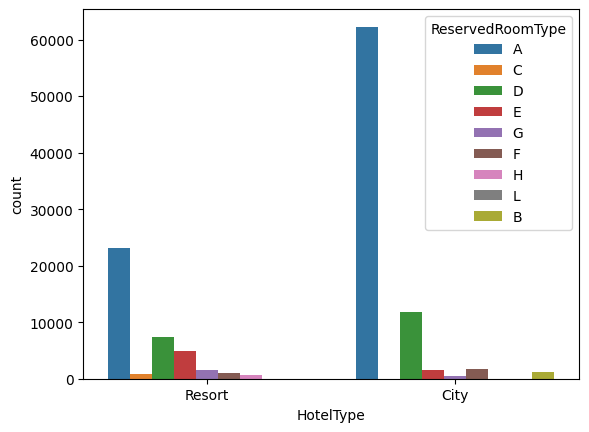

In [45]:
sns.countplot(data=booking, hue="ReservedRoomType", x="HotelType")

Room type A & D has the highest demands for both resort hotel city hotel.

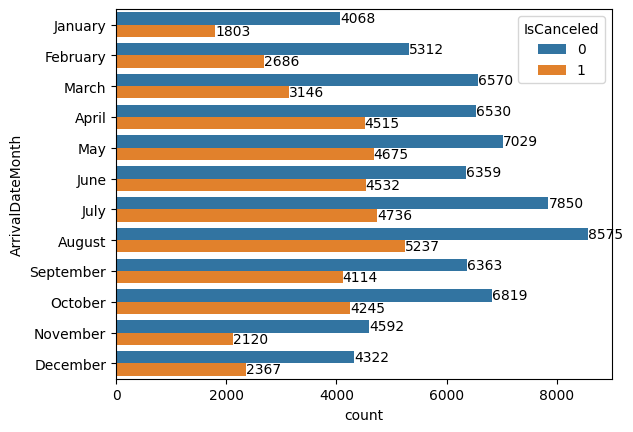

In [46]:
ax = sns.countplot(data=booking, y='ArrivalDateMonth', hue='IsCanceled', 
                   order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
for container in ax.containers:
    ax.bar_label(container)

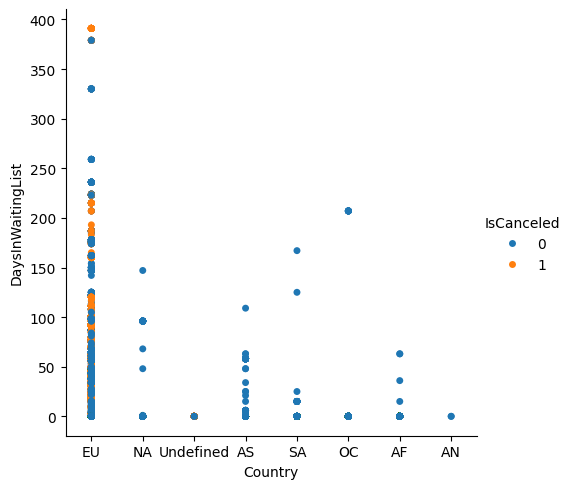

In [47]:
sns.catplot(data=continent, x="Country", y="DaysInWaitingList", jitter = False, hue="IsCanceled")

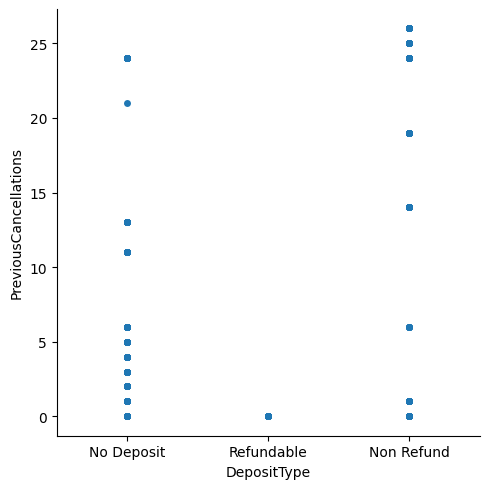

In [48]:
sns.catplot(data=booking, x="DepositType", y="PreviousCancellations", jitter=False)

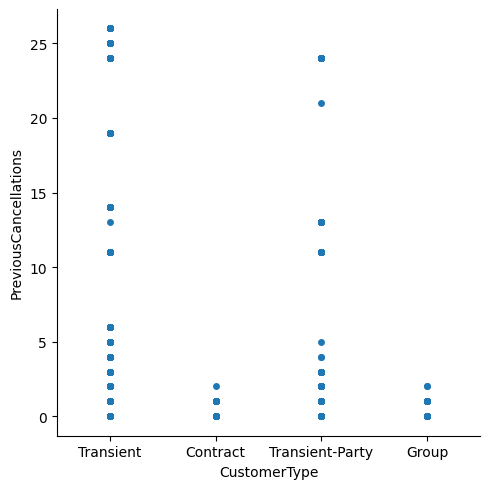

In [49]:
# sns.catplot(data=booking, x="CustomerType", y="PreviousCancellations", hue="IsCanceled", kind="swarm", aspect=.7)
sns.catplot(data=booking, x="CustomerType", y="PreviousCancellations", jitter=False)

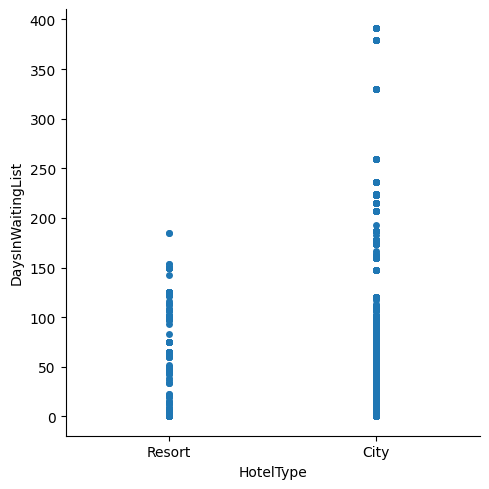

In [50]:
sns.catplot(data=booking, x="HotelType", y="DaysInWaitingList", jitter=False)

# Feature Engineering
----

In [ ]:
booking.drop(['ArrivalDateWeekNumber', 'ReservationStatus', 'ReservationStatusDate', 'ReservedRoomType', 
              'AssignedRoomType', "StaysInWeekendNights", "StaysInWeekNights", "Country", "Children", "Babies"], axis=1, inplace=True)

Merge some columns

In [ ]:
booking["NumsOfBookings"] = booking["PreviousBookingsNotCanceled"] + booking["PreviousCancellations"]
booking["Continent"] = continent["Country"]
booking["IsDesiredRoomType"] = continent["IsDesiredRoomType"]
booking["NumsOfStayNights"] = continent["StaysInWeekendNights"] + continent["StaysInWeekNights"]
booking["Children"] = (continent["Children"] + continent["Babies"]).astype(int)

In [ ]:
continent.to_csv("continent.csv", index=False)

In [ ]:
import calendar

month = {month: index for index, month in enumerate(calendar.month_name) if month}


# TODO

1. Remove outliers for "LeadTime" and "ADR"
2. Using one-hot coding for categorical attributes?
3. Try train & test accurary when grouping values in some attributes:
- PreviousCancellations, PreviousBookingsNotCanceled: 0, > 0
- Adults: 0, 1, 2, 3, >= 4
- RequiredCardParkingSpaces: need or not need